In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Starting URL for OpenWeatherMap Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9337ee860c059c6e38eb5ecfefe3f805


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhigansk
Processing Record 2 of Set 1 | surt
Processing Record 3 of Set 1 | nova venecia
Processing Record 4 of Set 1 | znamenskoye
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | karaul
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | houlton
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vostok
Processing Record 21 of Set 1 | vychegodskiy
Processing Record 2

Processing Record 40 of Set 4 | rio grande
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | alofi
Processing Record 43 of Set 4 | onguday
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | beira
Processing Record 46 of Set 4 | port moresby
Processing Record 47 of Set 4 | ormond beach
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | simitli
Processing Record 50 of Set 4 | mayo
Processing Record 1 of Set 5 | verkh-usugli
Processing Record 2 of Set 5 | mudigere
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | odweyne
Processing Record 6 of Set 5 | vao
Processing Record 7 of Set 5 | tonekabon
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | escondido
Processing Record 10 of Set 5 | jamestown
Processing Record 11 of Set 5 | valdivia
Processing Record 12 of Set 5 | omsukchan
Processing Record 13 of Set 5 | 

Processing Record 28 of Set 8 | khandyga
Processing Record 29 of Set 8 | samarai
Processing Record 30 of Set 8 | kentau
Processing Record 31 of Set 8 | kapoeta
Processing Record 32 of Set 8 | turayf
Processing Record 33 of Set 8 | suoyarvi
Processing Record 34 of Set 8 | berlin
Processing Record 35 of Set 8 | baherden
Processing Record 36 of Set 8 | linxia
Processing Record 37 of Set 8 | sultanpur
Processing Record 38 of Set 8 | jagtial
Processing Record 39 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 40 of Set 8 | saleaula
City not found. Skipping...
Processing Record 41 of Set 8 | asfi
Processing Record 42 of Set 8 | burgeo
Processing Record 43 of Set 8 | samaipata
Processing Record 44 of Set 8 | mumford
Processing Record 45 of Set 8 | eseka
Processing Record 46 of Set 8 | bismarck
Processing Record 47 of Set 8 | luena
Processing Record 48 of Set 8 | krasnyy
Processing Record 49 of Set 8 | verkhnyaya toyma
Processing Record 50 of Set 8 | pisco
Processing Re

Processing Record 15 of Set 12 | ballina
Processing Record 16 of Set 12 | marcona
City not found. Skipping...
Processing Record 17 of Set 12 | sikonge
Processing Record 18 of Set 12 | namibe
Processing Record 19 of Set 12 | port augusta
Processing Record 20 of Set 12 | yarada
Processing Record 21 of Set 12 | ahipara
Processing Record 22 of Set 12 | carbonera
Processing Record 23 of Set 12 | biggar
Processing Record 24 of Set 12 | novolabinskaya
Processing Record 25 of Set 12 | sohbatpur
Processing Record 26 of Set 12 | bad hersfeld
Processing Record 27 of Set 12 | jumla
Processing Record 28 of Set 12 | praia
Processing Record 29 of Set 12 | la asuncion
Processing Record 30 of Set 12 | bria
Processing Record 31 of Set 12 | castelo do piaui
Processing Record 32 of Set 12 | kiama
Processing Record 33 of Set 12 | zaoyang
Processing Record 34 of Set 12 | anadyr
Processing Record 35 of Set 12 | poum
Processing Record 36 of Set 12 | rocha
Processing Record 37 of Set 12 | georgiyevka
Processin

In [10]:
count_cities = len(city_data)
count_cities

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,4.84,82,100,18.03,RU,2021-04-10 01:02:49
1,Surt,31.2089,16.5887,57.99,67,0,15.39,LY,2021-04-10 01:02:49
2,Nova Venecia,-18.7106,-40.4006,67.01,81,82,4.09,BR,2021-04-10 01:02:49
3,Znamenskoye,57.1281,73.8282,27.16,97,16,4.68,RU,2021-04-10 01:02:49
4,Qaanaaq,77.4840,-69.3632,11.21,59,100,8.14,GL,2021-04-10 01:02:50
5,Tuktoyaktuk,69.4541,-133.0374,-14.80,70,75,12.66,CA,2021-04-10 01:02:50
6,Victoria,22.2855,114.1577,71.01,64,52,4.00,HK,2021-04-10 01:02:03
7,Avarua,-21.2078,-159.7750,84.20,74,87,3.44,CK,2021-04-10 01:02:51
8,Port Alfred,-33.5906,26.8910,62.49,84,86,2.46,ZA,2021-04-10 01:02:51
9,Houlton,46.1262,-67.8403,55.00,71,90,3.36,US,2021-04-10 01:02:51


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2021-04-10 01:02:49,66.7697,123.3711,4.84,82,100,18.03
1,Surt,LY,2021-04-10 01:02:49,31.2089,16.5887,57.99,67,0,15.39
2,Nova Venecia,BR,2021-04-10 01:02:49,-18.7106,-40.4006,67.01,81,82,4.09
3,Znamenskoye,RU,2021-04-10 01:02:49,57.1281,73.8282,27.16,97,16,4.68
4,Qaanaaq,GL,2021-04-10 01:02:50,77.4840,-69.3632,11.21,59,100,8.14
5,Tuktoyaktuk,CA,2021-04-10 01:02:50,69.4541,-133.0374,-14.80,70,75,12.66
6,Victoria,HK,2021-04-10 01:02:03,22.2855,114.1577,71.01,64,52,4.00
7,Avarua,CK,2021-04-10 01:02:51,-21.2078,-159.7750,84.20,74,87,3.44
8,Port Alfred,ZA,2021-04-10 01:02:51,-33.5906,26.8910,62.49,84,86,2.46
9,Houlton,US,2021-04-10 01:02:51,46.1262,-67.8403,55.00,71,90,3.36


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

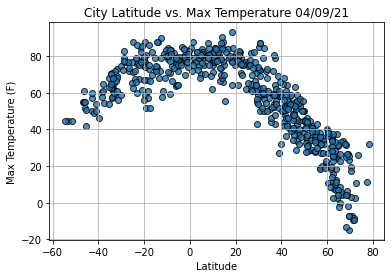

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

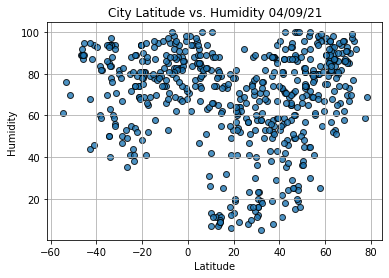

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

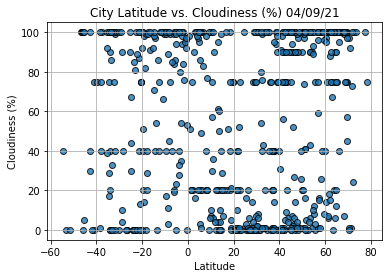

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

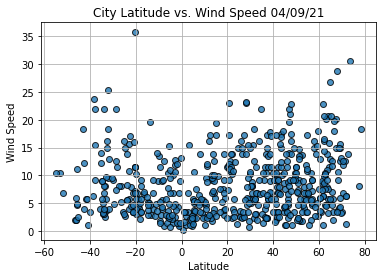

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph)"+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()